In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
(train_images.shape,train_labels.shape),(test_images.shape,test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

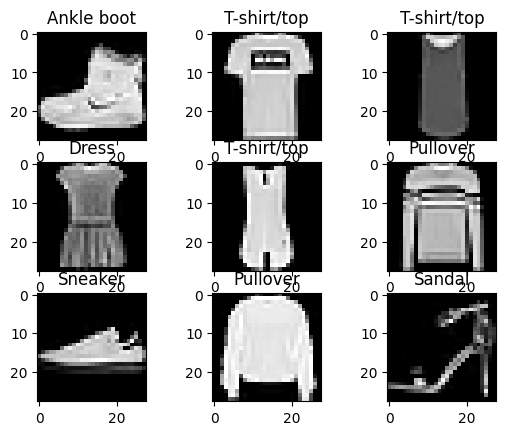

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i],cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0

In [9]:
train_images.min(),train_images.max()

(0.0, 1.0)

In [10]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
tf.__version__
import os
import h5py

In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
checkpoint_path="fashion_mnist.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
fashion_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [15]:
model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels),callbacks=fashion_callback)

Epoch 1/20



c:\Users\biovi\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



1866/1875 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.8199
Epoch 1: saving model to fashion_mnist.ckpt
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5074 - accuracy: 0.8201 - val_loss: 0.4232 - val_accuracy: 0.8466
Epoch 2/20
1863/1875 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8635
Epoch 2: saving model to fashion_mnist.ckpt
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8636 - val_loss: 0.3888 - val_accuracy: 0.8590
Epoch 3/20
1859/1875 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8769
Epoch 3: saving model to fashion_mnist.ckpt
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8771 - val_loss: 0.3807 - val_accuracy: 0.8629
Epoch 4/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.3132 - accuracy: 0.8841
Epoch 4: saving model to fashion_mnist.ckpt
1875/1875 [==============================] 

In [16]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8820


[0.3743557035923004, 0.8820000290870667]

In [18]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
prediction=probability_model.predict(test_images[:1])
print(prediction)
print(np.argmax(prediction))
print(class_names[np.argmax(prediction)])

1/1 [==============================] - 0s 62ms/step
[[0.08533894 0.08533894 0.08533894 0.08533894 0.08533894 0.08533895
  0.08533894 0.0853539  0.08533894 0.23193455]]
9
Ankle boot


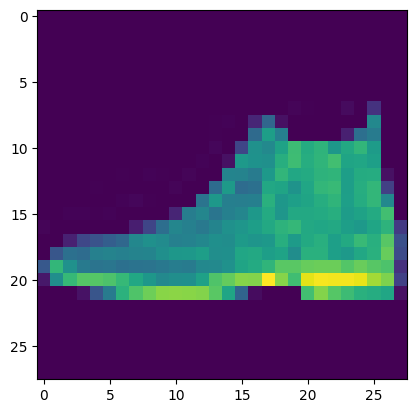

In [37]:
plt.imshow(test_images[:1][0])

In [17]:
model.save('fashion_model/model.h5')

c:\Users\biovi\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
loaded=tf.keras.models.load_model('fashion_model/model.h5')

In [21]:
loaded.predict(test_images[:1])

1/1 [==============================] - 0s 60ms/step


array([[2.1231848e-16, 7.4053034e-08, 9.3344898e-12, 7.3184060e-18,
        6.4246503e-13, 2.9562332e-06, 1.2428021e-11, 6.6178480e-05,
        2.2888592e-12, 9.9993074e-01]], dtype=float32)